In [24]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
#Unión de los archivos con sus respectivas categorías de búsqueda

files = {
    'juguetes':'mla1132_meli.csv',
    'elementos de fotografia': 'mla1039_meli.csv',
    'cuidado de la piel': 'mla1246_meli.csv',
    'accesorios' : 'mla3937_meli.csv',
    'herramientas' : 'mla407134_meli.csv'}

out_df = pd.DataFrame()
for key,value in files.items():
    df = pd.read_csv(f'./Data/{value}')
    df['Categoria']=key
    out_df = pd.concat([out_df, df])

out_df.to_csv(f'./Data/Categorias_complete.csv', index=False)

In [26]:
out_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19991 entries, 0 to 3996
Data columns (total 48 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   id                                                                 19991 non-null  object 
 1   title                                                              19991 non-null  object 
 2   thumbnail_id                                                       19991 non-null  object 
 3   listing_type_id                                                    19991 non-null  object 
 4   permalink                                                          19991 non-null  object 
 5   category_id                                                        19991 non-null  object 
 6   domain_id                                                          19991 non-null  object 
 7   order_backend          

In [27]:
out_df.head()

,id,title,thumbnail_id,listing_type_id,permalink,category_id,domain_id,order_backend,price,sold_quantity,...,seller__seller_reputation__metrics__cancellations__value,installments__quantity,installments__amount,installments__rate,days_remaining,years_active,Categoria,seller__car_dealer,seller__car_dealer_logo,variation_filters
0,MLA1112140771,Pileta Inflable Redonda Bestway Kiddie Lounge ...,623284-MLA53605777143_022023,gold_pro,https://www.mercadolibre.com.ar/pileta-inflabl...,MLA11226,MLA-INFLATABLE_POOLS,1,1692.9,250,...,0,6.0,282.15,0.00,6833,4,juguetes,NaN,NaN,NaN
1,MLA1275803410,Cry Babies Fantasy Dreamy Imc Toys 99180im,843969-MLA48269133730_112021,gold_special,https://www.mercadolibre.com.ar/cry-babies-fan...,MLA2968,MLA-DOLLS,2,15990.0,200,...,135,6.0,3953.53,48.35,7223,4,juguetes,NaN,NaN,NaN
2,MLA1109575910,Juego De Cartas Desconectados En Palabras,633026-MLA48408537360_122021,gold_special,https://www.mercadolibre.com.ar/juego-de-carta...,MLA1161,MLA-BOARD_GAMES,3,6499.0,5000,...,1,6.0,1606.88,48.35,6815,2,juguetes,NaN,NaN,NaN
3,MLA1110677111,Juego De Mesa Código Secreto Czech Games Editi...,960516-MLA44936648183_022021,gold_special,https://www.mercadolibre.com.ar/juego-de-mesa-...,MLA1161,MLA-BOARD_GAMES,4,9500.0,250,...,5,6.0,2348.88,48.35,6822,16,juguetes,NaN,NaN,NaN
4,MLA1240728057,Bellies Bebe Interactivo Beth Edic Especial In...,994457-MLA49925702800_052022,gold_special,https://www.mercadolibre.com.ar/bellies-bebe-i...,MLA2968,MLA-DOLLS,5,21900.0,0,...,28,6.0,5414.78,48.35,7200,10,juguetes,NaN,NaN,NaN


## EDA

In [28]:
out_df.columns

Index(['id', 'title', 'thumbnail_id', 'listing_type_id', 'permalink',
       'category_id', 'domain_id', 'order_backend', 'price', 'sold_quantity',
       'available_quantity', 'tags', 'shipping__logistic_type',
       'shipping__mode', 'shipping__store_pick_up', 'shipping__free_shipping',
       'shipping__tags', 'seller__id', 'seller__nickname', 'seller__tags',
       'seller__seller_reputation__level_id',
       'seller__seller_reputation__power_seller_status',
       'seller__seller_reputation__transactions__canceled',
       'seller__seller_reputation__transactions__completed',
       'seller__seller_reputation__transactions__ratings__negative',
       'seller__seller_reputation__transactions__ratings__neutral',
       'seller__seller_reputation__transactions__ratings__positive',
       'seller__seller_reputation__transactions__total',
       'seller__seller_reputation__metrics__sales__period',
       'seller__seller_reputation__metrics__sales__completed',
       'seller__seller_r

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


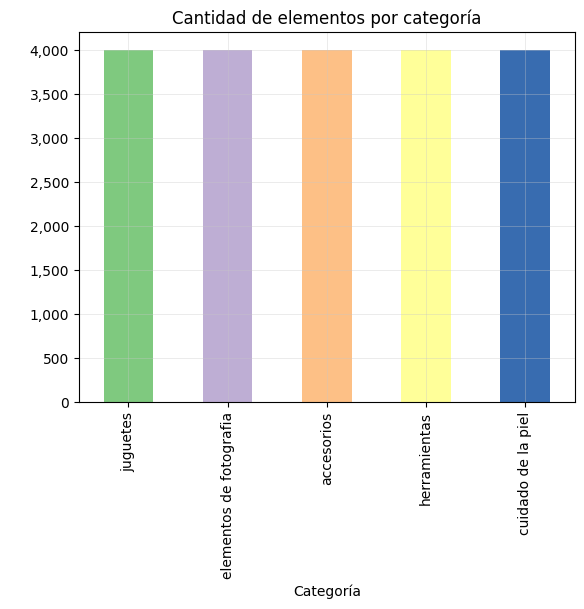

In [29]:
c=['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']
ax=out_df['Categoria'].value_counts().plot(kind = 'bar', title='Cantidad de elementos por categoría', color= c,xlabel='Categoría', ylabel=' ',)
ax=plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
ax=plt.grid(color='#c7c7c7', linewidth=0.5, axis='both', alpha=0.5)

In [30]:
# Reindexamos la base de datos que fue concatenada

out_df.reset_index(inplace=True)

In [31]:
#AutoEDA

prof = ProfileReport(out_df)
prof.to_file(output_file='eda_output.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 17.98it/s]


In [32]:
columns = out_df.columns

In [33]:
#Eliminamos las columnas que hacen referencias a cuestiones vinculadas al vendedor

regex = re.compile('^seller__')
seller_columns = list(filter(regex.match, columns))
print(seller_columns)

['seller__id', 'seller__nickname', 'seller__tags', 'seller__seller_reputation__level_id', 'seller__seller_reputation__power_seller_status', 'seller__seller_reputation__transactions__canceled', 'seller__seller_reputation__transactions__completed', 'seller__seller_reputation__transactions__ratings__negative', 'seller__seller_reputation__transactions__ratings__neutral', 'seller__seller_reputation__transactions__ratings__positive', 'seller__seller_reputation__transactions__total', 'seller__seller_reputation__metrics__sales__period', 'seller__seller_reputation__metrics__sales__completed', 'seller__seller_reputation__metrics__claims__period', 'seller__seller_reputation__metrics__claims__rate', 'seller__seller_reputation__metrics__claims__value', 'seller__seller_reputation__metrics__delayed_handling_time__period', 'seller__seller_reputation__metrics__delayed_handling_time__rate', 'seller__seller_reputation__metrics__delayed_handling_time__value', 'seller__seller_reputation__metrics__cancellat

In [34]:
out_df.drop(columns=seller_columns, inplace=True)

In [35]:
#Creamos dummies para las variables categoricas que usaremos

out_df = pd.get_dummies(out_df, columns=['domain_id', 'listing_type_id', 'shipping__logistic_type', 'shipping__mode', 'shipping__tags', 'variation_filters'])

In [36]:
#Eliminamos valores faltantes

out_df.dropna(inplace=True)

## Premodel

In [37]:
# Separamos las variables independientes de la target
X=out_df.drop(columns=['Categoria', 'id', 'title', 'thumbnail_id', 'permalink', 'order_backend', 'tags', 'category_id'])
y=out_df['Categoria']

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13990, 927)

(5997, 927)

(13990,)

(5997,)

## Classification models (pipeline)

In [38]:
class FeatureSelection(BaseEstimator, TransformerMixin):
    
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [39]:
selector=FeatureSelection(selected_features=X.columns.values)

In [40]:
pasos = [('feature_engineering',selector),
         ('preprocesamiento', MinMaxScaler()), 
         ('clasificador', KNeighborsClassifier())]

pipe=Pipeline(pasos)

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
param_grid = [{'feature_engineering':[selector, None],
               'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
               'clasificador': [KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression(solver='lbfgs')]}]

In [43]:
folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [44]:
grid = GridSearchCV(pipe, param_grid, cv=folds)
grid.fit(X_train, y_train)

/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/Users/sofiaforni/Documents/Data Science/TPFinal_MeliDataScience/venv_tpfinal/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureSelection(selected_features=array(['df_index', 'price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_rem...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object)),
                                                  None],
                          'preprocesamiento': [StandardScaler(), MinMaxScaler(),
                                             

### Resultados pipeline

In [45]:
grid.best_score_

0.9934953538241601

In [46]:
grid.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureSelection(selected_features=array(['df_index', 'price', 'sold_quantity', 'available_quantity',
       'shipping__store_pick_up', 'shipping__free_shipping',
       'installments__quantity', 'installments__amount',
       'installments__rate', 'days_remaining', 'years_active',
       'domain_id_MLA-ABRASIVE_SAWS',
       'domain_id_MLA-ACTION_CAMERA_A...
       "variation_filters_['WRISTBAND_COLOR', 'BEZEL_COLOR']",
       "variation_filters_['WRISTBAND_COLOR']",
       "variation_filters_['WRISTBAND_DESIGN']",
       "variation_filters_['anillo 4x4']",
       "variation_filters_['color y medida']",
       "variation_filters_['color']", "variation_filters_['grosor']",
       "variation_filters_['tamaño']"], dtype=object))),
                ('preprocesamiento', StandardScaler()),
                ('clasificador', LogisticRegression())])

In [47]:
accuracy_score(grid.best_estimator_.predict(X_test),y_test)

0.9961647490411872

In [48]:
y_pred = grid.best_estimator_.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

                         precision    recall  f1-score   support

             accesorios       1.00      1.00      1.00      1200
     cuidado de la piel       0.99      1.00      1.00      1199
elementos de fotografia       1.00      1.00      1.00      1199
           herramientas       0.99      0.99      0.99      1199
               juguetes       1.00      0.99      1.00      1200

               accuracy                           1.00      5997
              macro avg       1.00      1.00      1.00      5997
           weighted avg       1.00      1.00      1.00      5997

0.9961647490411872
